# Практика EDA (разведочный анализ данных)

Анализируем датасэт с информацией об атлетах, участвовавших в Олимпийских играх (olymp.csv). Разделитель запятая.

Данные содержат следующие признаки: \
ID - уникальный номер спортсмена \
Name - имя атлета \
Sex - пол (мужской - M,  женский - F) \
Age - возраст атлета \
Height - рост (в см) \
Weight - вес (в кг) \
Team - cтрана \
NOC - код страны от Олимпийского комитета (3 буквы) \
Games - год и сезон Олимпийских игр \
Year - год Олимпийских игр \
Season - сезон (Зимние - Winter,  Лето - Summer) \
City - город проведения Олимпийских игр \
Sport - спортивная дисциплина \
Event - категория спортивной дисциплины \
Medal - достоинство медали (Золото - Gold, Серебро - Silver, Бронза - Bronze, Без медали - NaN)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('olymp.csv')
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [2]:
df.shape

(271116, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [7]:
df['Age'].value_counts(dropna=False, normalize=True)

Age
23.0    0.080685
24.0    0.080113
22.0    0.076772
25.0    0.072688
21.0    0.070686
          ...   
77.0    0.000007
84.0    0.000004
96.0    0.000004
10.0    0.000004
97.0    0.000004
Name: proportion, Length: 75, dtype: float64

In [8]:
df[df['Age'].isna()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
147,54,Mohamed Jamshid Abadi,M,NaN,NaN,NaN,Iran,IRI,1948 Summer,1948,Summer,London,Boxing,Boxing Men's Heavyweight,NaN
152,58,Georgi Abadzhiev,M,NaN,NaN,NaN,Bulgaria,BUL,1924 Summer,1924,Summer,Paris,Cycling,"Cycling Men's Road Race, Individual",NaN
153,58,Georgi Abadzhiev,M,NaN,NaN,NaN,Bulgaria,BUL,1924 Summer,1924,Summer,Paris,Cycling,"Cycling Men's Road Race, Team",NaN
162,66,Mohamed Abakkar,M,NaN,156.0,48.0,Sudan,SUD,1972 Summer,1972,Summer,Munich,Boxing,Boxing Men's Flyweight,NaN
212,102,Sayed Fahmy Abaza,M,NaN,NaN,NaN,Egypt,EGY,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270679,135368,Antonio A. Zucchi,M,NaN,NaN,NaN,Argentina,ARG,1948 Summer,1948,Summer,London,Hockey,Hockey Men's Hockey,NaN
270774,135416,Star Zulu,M,NaN,NaN,NaN,Zambia,ZAM,1984 Summer,1984,Summer,Los Angeles,Boxing,Boxing Men's Bantamweight,NaN
270793,135426,Max Zumstein,M,NaN,NaN,NaN,Switzerland,SUI,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,NaN
270804,135434,Edmundo Ziga Erraz,M,NaN,180.0,95.0,Chile,CHI,1948 Summer,1948,Summer,London,Athletics,Athletics Men's Hammer Throw,NaN


In [9]:
df['Age'].mean()

25.556898357297374

In [10]:
df['Age'].median()

24.0

In [12]:
df.groupby(['Games', 'Sport'])['Age'].median().unstack()

Sport,Aeronautics,Alpine Skiing,Alpinism,Archery,Art Competitions,Athletics,Badminton,Baseball,Basketball,Basque Pelota,...,Table Tennis,Taekwondo,Tennis,Trampolining,Triathlon,Tug-Of-War,Volleyball,Water Polo,Weightlifting,Wrestling
Games,,,,,,,,,,,,,,,,,,,,,
1896 Summer,NaN,NaN,NaN,NaN,NaN,22.0,NaN,NaN,NaN,NaN,...,NaN,NaN,22.0,NaN,NaN,NaN,NaN,NaN,21.0,23.0
1900 Summer,NaN,NaN,NaN,34.0,NaN,23.0,NaN,NaN,NaN,26.0,...,NaN,NaN,30.0,NaN,NaN,27.0,NaN,20.5,NaN,NaN
1904 Summer,NaN,NaN,NaN,52.0,NaN,23.0,NaN,NaN,NaN,NaN,...,NaN,NaN,26.5,NaN,NaN,29.0,NaN,24.0,23.0,23.5
1906 Summer,NaN,NaN,NaN,NaN,NaN,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,23.0,NaN,NaN,24.0,NaN,NaN,26.0,24.0
1908 Summer,NaN,NaN,NaN,41.0,NaN,23.0,NaN,NaN,NaN,NaN,...,NaN,NaN,28.0,NaN,NaN,29.0,NaN,23.0,NaN,23.0
1912 Summer,NaN,NaN,NaN,NaN,45.0,23.0,NaN,NaN,NaN,NaN,...,NaN,NaN,27.0,NaN,NaN,31.5,NaN,23.0,NaN,24.0
1920 Summer,NaN,NaN,NaN,44.0,36.0,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,29.0,NaN,NaN,31.0,NaN,27.0,26.0,28.0
1924 Summer,NaN,NaN,NaN,NaN,43.0,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,28.5,NaN,NaN,NaN,NaN,25.0,26.0,26.0
1924 Winter,NaN,NaN,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.groupby(['Games', 'Sport'])['Age'].transform("median")

0         26.0
1         26.0
2         24.0
3         27.0
4         23.0
          ... 
271111    24.0
271112    24.0
271113    24.0
271114    29.0
271115    29.0
Name: Age, Length: 271116, dtype: float64

In [16]:
df['Age_median'] = df['Age'].fillna(df.groupby(['Games', 'Sport'])['Age'].transform("median"))

In [17]:
df[df['Age'].isna()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Age_mdeian,Age_median
147,54,Mohamed Jamshid Abadi,M,NaN,NaN,NaN,Iran,IRI,1948 Summer,1948,Summer,London,Boxing,Boxing Men's Heavyweight,NaN,21.0,21.0
152,58,Georgi Abadzhiev,M,NaN,NaN,NaN,Bulgaria,BUL,1924 Summer,1924,Summer,Paris,Cycling,"Cycling Men's Road Race, Individual",NaN,24.0,24.0
153,58,Georgi Abadzhiev,M,NaN,NaN,NaN,Bulgaria,BUL,1924 Summer,1924,Summer,Paris,Cycling,"Cycling Men's Road Race, Team",NaN,24.0,24.0
162,66,Mohamed Abakkar,M,NaN,156.0,48.0,Sudan,SUD,1972 Summer,1972,Summer,Munich,Boxing,Boxing Men's Flyweight,NaN,23.0,23.0
212,102,Sayed Fahmy Abaza,M,NaN,NaN,NaN,Egypt,EGY,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,24.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270679,135368,Antonio A. Zucchi,M,NaN,NaN,NaN,Argentina,ARG,1948 Summer,1948,Summer,London,Hockey,Hockey Men's Hockey,NaN,28.0,28.0
270774,135416,Star Zulu,M,NaN,NaN,NaN,Zambia,ZAM,1984 Summer,1984,Summer,Los Angeles,Boxing,Boxing Men's Bantamweight,NaN,22.0,22.0
270793,135426,Max Zumstein,M,NaN,NaN,NaN,Switzerland,SUI,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,NaN,24.0,24.0
270804,135434,Edmundo Ziga Erraz,M,NaN,180.0,95.0,Chile,CHI,1948 Summer,1948,Summer,London,Athletics,Athletics Men's Hammer Throw,NaN,24.0,24.0


(array([5.3000e+01, 3.2270e+03, 1.7423e+04, 4.6874e+04, 6.8187e+04,
        5.4923e+04, 3.6225e+04, 1.9020e+04, 1.0260e+04, 3.9410e+03,
        3.6820e+03, 2.5810e+03, 1.7250e+03, 1.0470e+03, 6.5200e+02,
        3.9700e+02, 2.4100e+02, 2.1800e+02, 1.7000e+02, 5.6000e+01,
        1.1300e+02, 6.5000e+01, 2.3000e+01, 2.0000e+00, 5.0000e+00,
        1.0000e+00, 3.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([10. , 12.9, 15.8, 18.7, 21.6, 24.5, 27.4, 30.3, 33.2, 36.1, 39. ,
        41.9, 44.8, 47.7, 50.6, 53.5, 56.4, 59.3, 62.2, 65.1, 68. , 70.9,
        73.8, 76.7, 79.6, 82.5, 85.4, 88.3, 91.2, 94.1, 97. ]),
 <BarContainer object of 30 artists>)

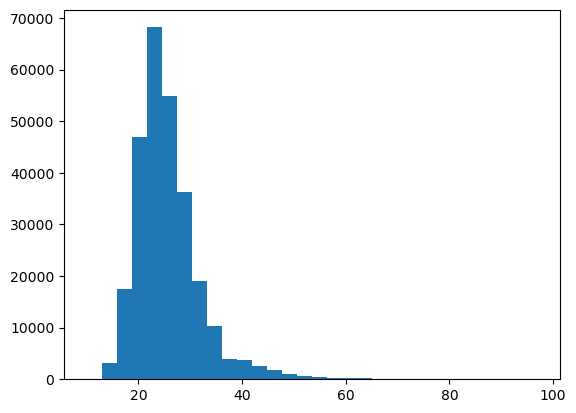

In [21]:
plt.hist(df["Age_median"], bins = 30) #строим гистограмму

(array([5.3000e+01, 3.2270e+03, 1.7380e+04, 4.6065e+04, 6.4409e+04,
        5.3407e+04, 3.4994e+04, 1.8605e+04, 9.6210e+03, 3.5650e+03,
        3.5680e+03, 2.3420e+03, 1.4210e+03, 1.0470e+03, 6.4300e+02,
        3.9700e+02, 2.4000e+02, 2.1800e+02, 1.7000e+02, 5.6000e+01,
        1.1300e+02, 6.5000e+01, 2.3000e+01, 2.0000e+00, 5.0000e+00,
        1.0000e+00, 3.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([10. , 12.9, 15.8, 18.7, 21.6, 24.5, 27.4, 30.3, 33.2, 36.1, 39. ,
        41.9, 44.8, 47.7, 50.6, 53.5, 56.4, 59.3, 62.2, 65.1, 68. , 70.9,
        73.8, 76.7, 79.6, 82.5, 85.4, 88.3, 91.2, 94.1, 97. ]),
 <BarContainer object of 30 artists>)

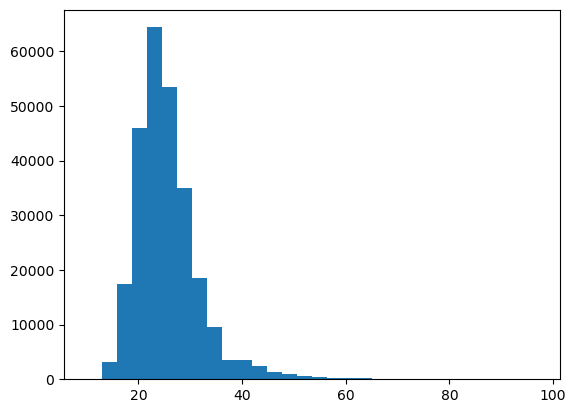

In [22]:
plt.hist(df["Age"], bins = 30) #строим гистограмму

In [23]:
df[df['Height'].isna()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Age_mdeian,Age_median
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,24.0,24.0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,34.0,34.0
29,10,"Einar Ferdinand ""Einari"" Aalto",M,26.0,NaN,NaN,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,NaN,26.0,26.0
35,15,Arvo Ossian Aaltonen,M,22.0,NaN,NaN,Finland,FIN,1912 Summer,1912,Summer,Stockholm,Swimming,Swimming Men's 200 metres Breaststroke,NaN,22.0,22.0
36,15,Arvo Ossian Aaltonen,M,22.0,NaN,NaN,Finland,FIN,1912 Summer,1912,Summer,Stockholm,Swimming,Swimming Men's 400 metres Breaststroke,NaN,22.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271038,135539,Marius Edmund Zwiller,M,18.0,NaN,NaN,France,FRA,1924 Summer,1924,Summer,Paris,Swimming,Swimming Men's 200 metres Breaststroke,NaN,18.0,18.0
271042,135542,Werner Zwingli,M,29.0,NaN,NaN,Switzerland,SUI,1956 Winter,1956,Winter,Cortina d'Ampezzo,Cross Country Skiing,Cross Country Skiing Men's 15 kilometres,NaN,29.0,29.0
271043,135542,Werner Zwingli,M,29.0,NaN,NaN,Switzerland,SUI,1956 Winter,1956,Winter,Cortina d'Ampezzo,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,NaN,29.0,29.0
271075,135552,Jan (Johann-) Zybert (Siebert-),M,20.0,NaN,NaN,Poland,POL,1928 Summer,1928,Summer,Amsterdam,Cycling,"Cycling Men's Team Pursuit, 4,000 metres",NaN,20.0,20.0


In [29]:
df.groupby(['Sex', 'Games', 'Sport'])['Height'].transform("median")

0         200.0
1         178.0
2         171.5
3           NaN
4         167.0
          ...  
271111    178.0
271112    177.5
271113    177.5
271114    182.0
271115    184.0
Name: Height, Length: 271116, dtype: float64

<Axes: >

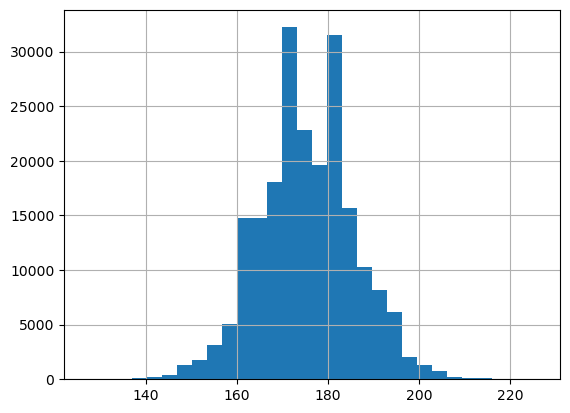

In [31]:
df['Height'].hist(bins=30)

In [33]:
df['Height'].fillna(df['Height'].mean(), inplace=True)

In [34]:
df['Height']

0         180.00000
1         170.00000
2         175.33897
3         175.33897
4         185.00000
            ...    
271111    179.00000
271112    176.00000
271113    176.00000
271114    185.00000
271115    185.00000
Name: Height, Length: 271116, dtype: float64

In [37]:
df.describe().applymap

<bound method DataFrame.applymap of                   ID            Age        Height         Weight  \
count  271116.000000  261642.000000  271116.00000  271116.000000   
mean    68248.954396      25.556898     175.33897      70.702393   
std     39022.286345       6.393561       9.27810      12.574690   
min         1.000000      10.000000     127.00000      25.000000   
25%     34643.000000      21.000000     170.00000      63.000000   
50%     68205.000000      24.000000     175.33897      70.702393   
75%    102097.250000      28.000000     180.00000      75.000000   
max    135571.000000      97.000000     226.00000     214.000000   

                Year     Age_mdeian     Age_median  
count  271116.000000  271116.000000  271116.000000  
mean     1978.378480      25.620170      25.620170  
std        29.877632       6.403051       6.403051  
min      1896.000000      10.000000      10.000000  
25%      1960.000000      22.000000      22.000000  
50%      1988.000000      24.0000

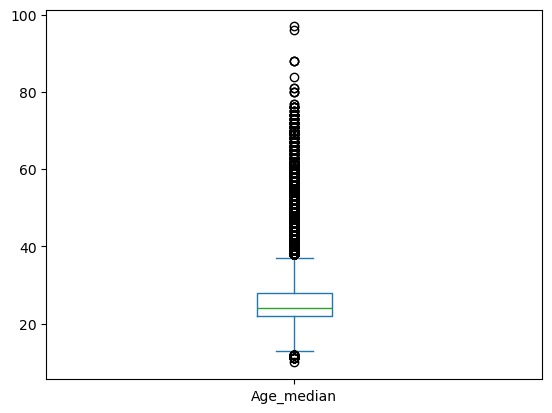

In [41]:
df['Age_median'].plot.box();

In [46]:
df[(df['Age_median'] < low)]

NameError: name 'low' is not defined